In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases # Python has a file containing a dictionary of encoding names and associated aliases

# the matplotlib plots will appear directly below the cell in which the plot function was called.
%matplotlib inline

In [16]:
crime = pd.read_csv("C:/Users/HP/Downloads/crime.csv", encoding="latin-1")


In [17]:
crime.head() # Quick check on how the dataset looks like


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [18]:
crime.shape # Checking the shape of the data. It has 319,073 rows and 17 columns


(319073, 17)

In [19]:
crime.duplicated().sum() # Counting the duplicate rows


23

In [21]:
crime.drop_duplicates(inplace=True) # Dropping the duplicate rows


In [22]:
crime.shape # Checking the shape again to see if dropping the duplicate rows worked


(319050, 17)

In [23]:
crime.head() # Quick check of the beginning of the dataframe


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [24]:
crime.info() # Summary information about the dataframe


<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long             

In [25]:
# Changing the data type from object to datetime for the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [26]:
# Check if it worked
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET        

In [27]:
# easily extract datetime information frome the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE.dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
319068    2016
319069    2015
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [28]:

crime.OCCURRED_ON_DATE.dt.month

0         9
1         8
2         9
3         9
4         9
         ..
319068    6
319069    7
319070    7
319071    5
319072    6
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [29]:
crime.OCCURRED_ON_DATE.dt.week

C:\Users\HP\AppData\Local\Temp\ipykernel_15364\2588699237.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  crime.OCCURRED_ON_DATE.dt.week


0         35
1         34
2         36
3         36
4         36
          ..
319068    22
319069    28
319070    28
319071    22
319072    26
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [30]:

crime.OCCURRED_ON_DATE.dt.hour

0         13
1          0
2         19
3         21
4         21
          ..
319068    17
319069    13
319070    13
319071    19
319072     0
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [31]:
crime.OCCURRED_ON_DATE.dt.minute


0          0
1          0
2         27
3         16
4          5
          ..
319068    25
319069    38
319070    38
319071    35
319072    12
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [32]:
crime.describe() # summary information on the numeric columns


,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2016.560674,6.609622,13.118176,42.214373,-70.908260
std,1185.308921,0.996312,3.273677,6.294258,2.159845,3.493746
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [33]:
crime.describe(include='object') # summary information on the non-numeric columns


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [34]:
crime.columns


Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [35]:
crime.columns[np.sum(crime.isnull()) != 0]


Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [36]:

# Checking for columns with missing values
crime.columns[np.sum(crime.isnull()) != 0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [37]:
# Checking for columns with no missing values
crime.columns[np.sum(crime.isnull()) == 0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [38]:

# Checking for the number of unique values in each column
for col in crime.columns:
    unique_count = crime[col].nunique()
    print(col + " has " + str(unique_count) + " unique values")

INCIDENT_NUMBER has 282517 unique values
OFFENSE_CODE has 222 unique values
OFFENSE_CODE_GROUP has 67 unique values
OFFENSE_DESCRIPTION has 244 unique values
DISTRICT has 12 unique values
REPORTING_AREA has 879 unique values
SHOOTING has 1 unique values
OCCURRED_ON_DATE has 233229 unique values
YEAR has 4 unique values
MONTH has 12 unique values
DAY_OF_WEEK has 7 unique values
HOUR has 24 unique values
UCR_PART has 4 unique values
STREET has 4657 unique values
Lat has 18178 unique values
Long has 18178 unique values
Location has 18194 unique values


In [39]:

# What are the most common crimes in terms of offense group?
crime.OFFENSE_CODE_GROUP.value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

In [40]:
crime.OFFENSE_CODE_GROUP.value_counts()[:10]


Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18749
Other                              18073
Drug Violation                     16545
Simple Assault                     15826
Vandalism                          15414
Verbal Disputes                    13099
Towed                              11287
Name: OFFENSE_CODE_GROUP, dtype: int64

In [41]:
crime.shape[0]


319050

Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: OFFENSE_CODE_GROUP, dtype: float64

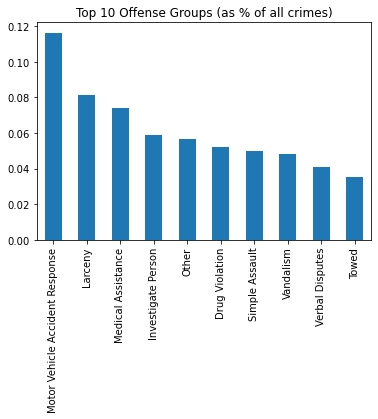

In [42]:
offense_group_vals = crime.OFFENSE_CODE_GROUP.value_counts()[:10]

display(offense_group_vals / crime.shape[0])

# Creating a bar chart of the Top 10 offense groups
(offense_group_vals / crime.shape[0]).plot(kind='bar');
plt.title('Top 10 Offense Groups (as % of all crimes)');

In [43]:
# What are the least common offense groups?
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: OFFENSE_CODE_GROUP, dtype: int64

In [44]:

# Question- What are the most common offense descriptions?
crime.OFFENSE_DESCRIPTION.value_counts()

SICK/INJURED/MEDICAL - PERSON                  18783
INVESTIGATE PERSON                             18753
M/V - LEAVING SCENE - PROPERTY DAMAGE          16323
VANDALISM                                      15153
ASSAULT SIMPLE - BATTERY                       14791
                                               ...  
KILLING OF FELON BY POLICE                         1
AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON         1
DRUGS - GLUE INHALATION                            1
ROBBERY - KNIFE - STREET                           1
DRUGS - POSS CLASS D - INTENT MFR DIST DISP        1
Name: OFFENSE_DESCRIPTION, Length: 244, dtype: int64

SICK/INJURED/MEDICAL - PERSON            0.058872
INVESTIGATE PERSON                       0.058778
M/V - LEAVING SCENE - PROPERTY DAMAGE    0.051161
VANDALISM                                0.047494
ASSAULT SIMPLE - BATTERY                 0.046360
VERBAL DISPUTE                           0.041056
TOWED MOTOR VEHICLE                      0.035377
INVESTIGATE PROPERTY                     0.034866
LARCENY THEFT FROM BUILDING              0.028425
THREATS TO DO BODILY HARM                0.028340
Name: OFFENSE_DESCRIPTION, dtype: float64

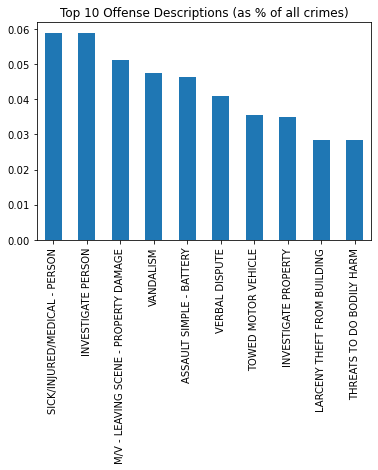

In [45]:
# Question 2 - Now try and create a bar chart of the Top 10 Offense Descriptions as a % of total crimes

offense_description_vals = crime.OFFENSE_DESCRIPTION.value_counts()[:10]

display(offense_description_vals / crime.shape[0])

(offense_description_vals / crime.shape[0]).plot(kind='bar');
plt.title('Top 10 Offense Descriptions (as % of all crimes)');

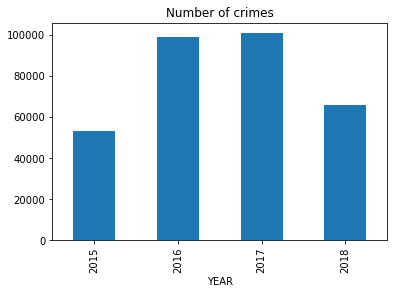

In [46]:

# In which year were the most crimes committed?
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind='bar');
plt.title('Number of crimes');

DAY_OF_WEEK
Friday       48489
Wednesday    46727
Thursday     46655
Tuesday      46376
Monday       45674
Saturday     44816
Sunday       40313
Name: INCIDENT_NUMBER, dtype: int64

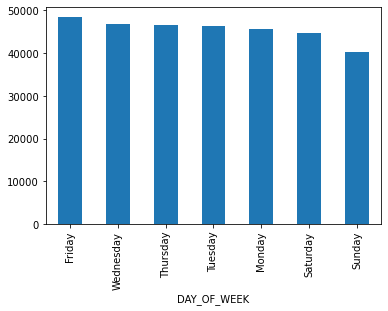

In [47]:
# Question 3 - Are there more crimes committed on specific days?

display(crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False));

crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False).plot(kind='bar');

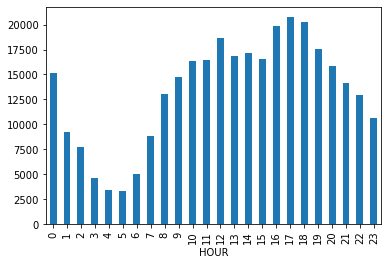

In [49]:
# Are there more crimes during specific hours?
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind='bar');

In [50]:

# On what days and during which hours are the most crimes committed?

week_and_hour = crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()


In [51]:
week_and_hour = week_and_hour[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]


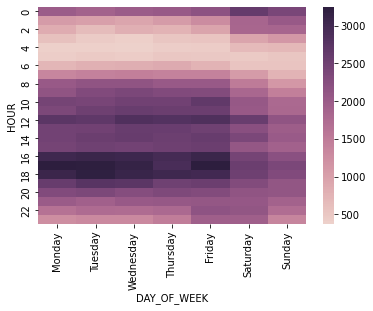

In [52]:
sns.heatmap(week_and_hour, cmap=sns.cubehelix_palette(as_cmap=True));


In [ ]:

# In which months were the number of crimes below average? 
# In which months on average did the most crimes occur?

In [53]:

# if the value is less than the average crime per month, highlight the value in blue

avg_crime = crime.groupby(['YEAR', 'MONTH']).count()['INCIDENT_NUMBER'].mean()
print("The average number of crimes is " + str(avg_crime))

year_and_month = crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v, props=''):
    return props if v < avg_crime else None
s2 = year_and_month.style.applymap(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s2

The average number of crimes is 7976.25


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


In [56]:
# Use apply to highlight the maximum in a column in darkgreen

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)

YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


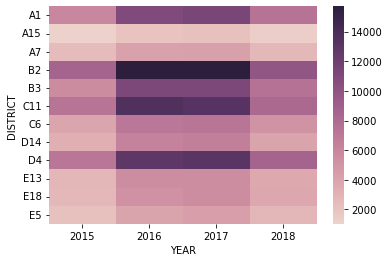

In [57]:

# Question 4 - In which districts were the most crimes commmitted on yearly basis? 
# Try and use everything you've learned in this video to answer this question.
# Feel free to use functions, tables and other visuals.

district_and_year = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

sns.heatmap(district_and_year, cmap=sns.cubehelix_palette(as_cmap=True));

In [58]:

# if the value is less than the average crime per district per year, highlight the value in blue

avg_crime_district = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].mean()
print("The average crime per district per year is: " + str(avg_crime_district))

def style_negative(v, props=''):
    return props if v < avg_crime_district else None
s3 = district_and_year.style.applymap(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s3

The average crime per district per year is: 6610.104166666667


YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601


In [59]:
# Highlight the maximum value in each colummn with darkgreen

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s3.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601
